In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import sklearn.metrics as metrics
from hmmlearn import hmm

import sys
sys.path.insert(1, r'C:\dlc_projects\Analysis\git_repo\util')
from iteration import dlc_iter
from kinematics import dlc_kinematics
import episode_length as epi
from visualization_config import visual_config


iter=dlc_iter()
kin=dlc_kinematics()
vis=visual_config()

In [2]:
evaluate=[ 'LID', 'SUM', 'SKF', 'D1A', 'D2A' ]
t_points=[30,40]

d_file=r'C:\dlc_projects\Analysis\git_repo\data\d_base.npy'
iter.treatments=evaluate
dct=iter.get_treatments(d_file)

m_file=r'C:\dlc_projects\Analysis\git_repo\data\3DHMM.pkl'

with open(m_file, "rb") as file: remodel=pickle.load(file)

In [76]:


lengs=epi.norm_lengths(dct, remodel, kin, t_points)

treat='LID'
lid_histo=epi.sort_treat_histo(lengs, treat)

treat='SUM'
sum_histo=epi.sort_treat_histo(lengs, treat)

treat='D1A'
d1a_histo=epi.sort_treat_histo(lengs, treat)



[0.30241935 0.24193548 0.13709677 0.12903226 0.3266129  0.83467742
 0.04435484 0.11693548 0.3266129  0.13306452 0.24596774 0.0483871
 0.05241935 0.31854839 0.14112903 0.26209677 0.44354839 0.23387097
 0.66129032 0.14112903 0.2016129  0.08467742 0.12903226 0.19758065
 0.03629032 0.06854839 0.04032258 0.36290323 0.05645161 0.19758065
 0.0483871  0.43548387 0.0483871  0.16532258 0.03225806 0.03629032
 0.03629032 0.09274194 0.03225806 0.04032258 0.06854839 0.5766129
 1.         0.0483871  0.03225806 0.18548387 0.27419355 0.03629032
 0.05241935 0.14919355 0.04435484 0.12903226 0.03225806 0.04435484]
[0.12844037 0.06116208 0.0733945  0.13455657 0.3058104  0.14984709
 0.27217125 0.1529052  0.24464832 0.04281346 0.10397554 0.29969419
 0.13761468 0.24464832 0.12232416 0.17431193 0.2324159  0.03058104
 0.03669725 0.02140673 0.03363914 0.12232416 0.09480122 0.18654434
 1.         0.13455657 0.06727829 0.04587156 0.28746177 0.06422018
 0.0733945  0.10091743 0.11926606 0.18042813 0.07033639 0.04281

                                                ''' Visualization'''

In [80]:
import numpy as np

n=25
bins=np.arange(0,1,1/n)


d1a_hist, edge=np.histogram(d1a_histo, bins)
lid_hist, edge=np.histogram(lid_histo, bins)
sum_hist, edge=np.histogram(sum_histo, bins)


dataframe=pd.DataFrame({'LD-3mg':lid_hist/np.sum(lid_hist), 'D1A':d1a_hist/np.sum(d1a_hist), 'D2Ag':sum_hist/np.sum(sum_hist), 'edges':edge[:-1]})
dataframe.head()


,LD-3mg,D1A,D2Ag,edges
0,0.182331,0.255187,0.198895,0.00
1,0.265038,0.269710,0.209945,0.04
2,0.124060,0.151452,0.182320,0.08
3,0.105263,0.080913,0.099448,0.12
4,0.062030,0.064315,0.110497,0.16


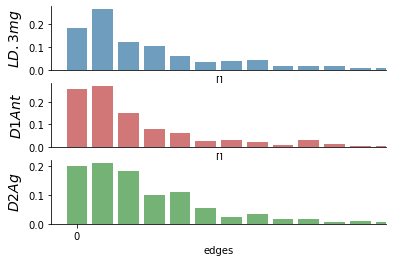

In [84]:
#n=25
fig, ax=plt.subplots(3,1)




sns.barplot(x=dataframe['edges'], y=dataframe['LD-3mg'], color=vis.treatment_colors['LD-3mg'],
                            alpha=0.7, ax=ax[0])


ax[0].set_ylabel(r'$LD.3mg $', fontdict=vis.label_font)
ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('')
ax[0].set_xlim(-1,12)
sns.despine(top=True, right=True, ax=ax[0])


sns.barplot(x=dataframe['edges'], y=dataframe['D1A'], color=vis.treatment_colors['D1Ant'],
                            alpha=0.7, ax=ax[1])


ax[1].set_ylabel(r'$D1Ant $', fontdict=vis.label_font)
ax[1].set_xticks([])
ax[1].set_xticklabels([])
ax[1].set_xlabel('')
ax[1].set_xlim(-1,12)

sns.despine(top=True, right=True, ax=ax[1])


sns.barplot(x=dataframe['edges'], y=dataframe['D2Ag'], color=vis.treatment_colors['D2Ag'],
                            alpha=0.7, ax=ax[2])


ax[2].set_ylabel(r'$D2Ag $', fontdict=vis.label_font)
ax[2].set_xticks([0, 12.5, 25, 37.5, 50])
ax[2].set_xticklabels([0, 0.25, 0.5, 0.75,  1])
ax[2].set_xlim(-1,12)

sns.despine(top=True, right=True, ax=ax[2])



